In [1]:
#Packages for notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Spike dataframe vs no spike dataframe
spike_data = pd.read_csv('daily_spike_vs_none_1.5sigma_all.csv')

Intercept: 0.30438527900092005
Spike: -0.0008
ExpectedDailyVariance: 0.0310
SP500_actual_volatility: 0.8110
SP500_expected_volatility: 0.0576
R^2: 0.21498134987333606


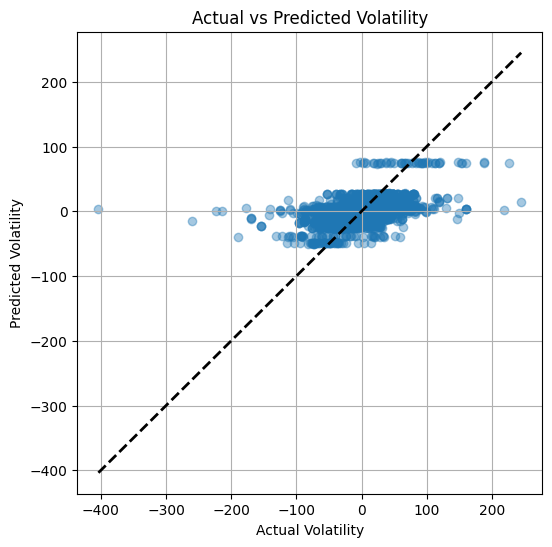

In [2]:
#A very basic linear regression model fitting example for daily spike and day-after volatility
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X_cols = ['Spike', 'ExpectedDailyVariance', 'SP500_actual_volatility', 'SP500_expected_volatility']

# Convert columns to numeric types (will turn any non-numeric into NaN)
for col in X_cols + ['actual_volatility']:
    spike_data[col] = pd.to_numeric(spike_data[col], errors='coerce')

# Drop rows with any NaN in features or target (do this before fitting!)
clean_df = spike_data.dropna(subset=X_cols + ['actual_volatility'])

X = clean_df[X_cols]*1000
y = clean_df['actual_volatility'] *1000


# Replace this with your actual loaded DataFrame
# spike_data = pd.read_csv('your_data.csv')
# Or use your existing DataFrame


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print("Intercept:", model.intercept_)
for feature, coef in zip(X_cols, model.coef_):
    print(f"{feature}: {coef:.4f}")
print("R^2:", model.score(X, y))

# Plot predicted vs. actual
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # 45-degree line
plt.xlabel('Actual Volatility')
plt.ylabel('Predicted Volatility')
plt.title('Actual vs Predicted Volatility')
plt.grid(True)
plt.show()


Intercept: 0.31577446273671966
Spike: 0.0000
weekly_SP500_actual_volatility: 1.1623
weekly_SP500_expected_volatility: -0.1125
R^2: 0.07062639137327031


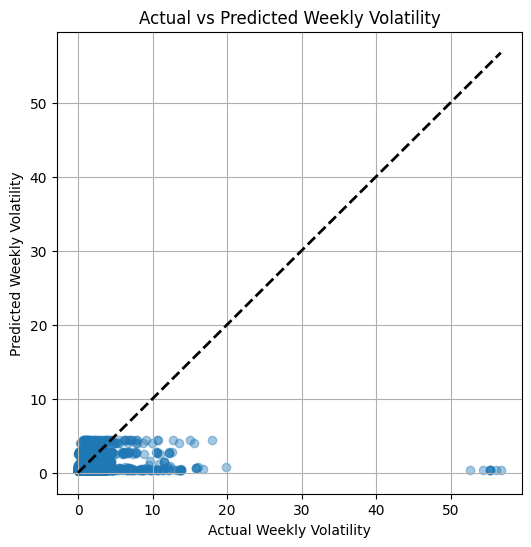

In [3]:
#Repeat for daily spike vs week after volatility
#Convert columns to numeric types (will turn any non-numeric into NaN)
for col in X_cols + ['actual_weekly_volatility']:
    spike_data[col] = pd.to_numeric(spike_data[col], errors='coerce')
#Drop rows with any NaN in features or target (do this before fitting!)
clean_df = spike_data.dropna(subset=X_cols + ['actual_weekly_volatility'])

X_cols = ['Spike', 'weekly_SP500_actual_volatility', 'weekly_SP500_expected_volatility']
X = clean_df[X_cols]*1000
y = clean_df['actual_weekly_volatility'] *1000
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print("Intercept:", model.intercept_)
for feature, coef in zip(X_cols, model.coef_):
    print(f"{feature}: {coef:.4f}")
print("R^2:", model.score(X, y))
# Plot predicted vs. actual
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # 45-degree line
plt.xlabel('Actual Weekly Volatility')
plt.ylabel('Predicted Weekly Volatility')
plt.title('Actual vs Predicted Weekly Volatility')
plt.grid(True)
plt.show()

Intercept: 0.30692981441850964
Spike: 0.0001
biweekly_SP500_actual_volatility: 1.2172
biweekly_SP500_expected_volatility: -0.1212
R^2: 0.0943500994209292


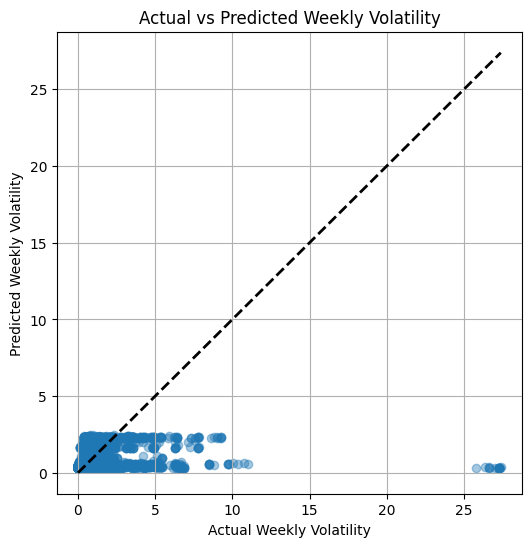

In [4]:
#repeat for daily spike vs biweek after volatility
y
#Convert columns to numeric types (will turn any non-numeric into NaN)
for col in X_cols + ['actual_biweekly_volatility']:
    spike_data[col] = pd.to_numeric(spike_data[col], errors='coerce')
#Drop rows with any NaN in features or target (do this before fitting!)
clean_df = spike_data.dropna(subset=X_cols + ['actual_biweekly_volatility'])

X_cols = ['Spike', 'biweekly_SP500_actual_volatility', 'biweekly_SP500_expected_volatility']
X = clean_df[X_cols]*1000
y = clean_df['actual_biweekly_volatility'] *1000
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print("Intercept:", model.intercept_)
for feature, coef in zip(X_cols, model.coef_):
    print(f"{feature}: {coef:.4f}")
print("R^2:", model.score(X, y))
# Plot predicted vs. actual
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # 45-degree line
plt.xlabel('Actual Weekly Volatility')
plt.ylabel('Predicted Weekly Volatility')
plt.title('Actual vs Predicted Weekly Volatility')
plt.grid(True)
plt.show()

Test RMSE: 0.022737364302892346
Spike_lag_1: -0.0010
Spike_lag_2: -0.0004
Spike_lag_3: 0.0006
Volatility_lag_1: 0.2003
Volatility_lag_2: -0.0253
Volatility_lag_3: -0.0263
MarketVolatility_lag_1: 0.0904
MarketVolatility_lag_2: 0.0389
MarketVolatility_lag_3: -0.0304
Test R²: 0.0093


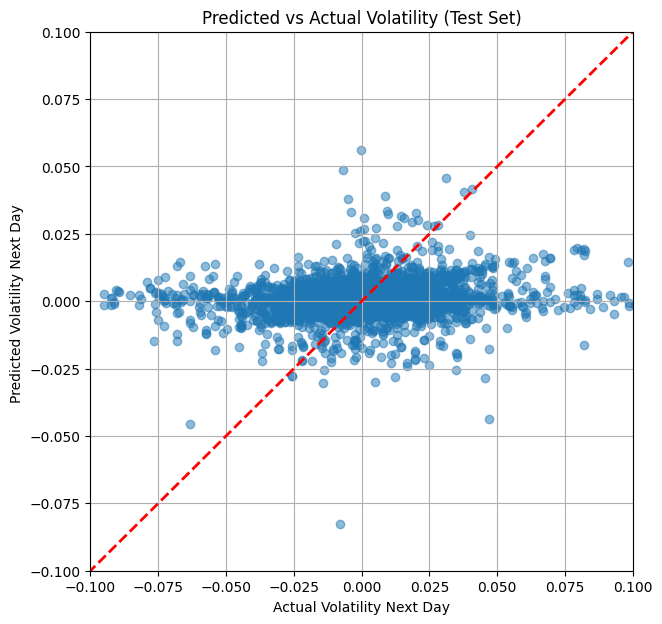

In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set max number of lags to include
max_lag = 3

# Create lagged features grouped by Ticker
for lag in range(1, max_lag + 1):
    spike_data[f'Spike_lag_{lag}'] = spike_data.groupby('Ticker')['Spike'].shift(lag)
    spike_data[f'Volatility_lag_{lag}'] = spike_data.groupby('Ticker')['actual_volatility'].shift(lag)
    spike_data[f'MarketVolatility_lag_{lag}'] = spike_data.groupby('Ticker')['SP500_actual_volatility'].shift(lag)

# Create target variable: future volatility (day after)
spike_data['Volatility_next'] = spike_data.groupby('Ticker')['actual_volatility'].shift(-1)

# Drop rows with any missing values for these lagged features or target
features = [f'Spike_lag_{lag}' for lag in range(1, max_lag + 1)] + \
           [f'Volatility_lag_{lag}' for lag in range(1, max_lag + 1)] + \
           [f'MarketVolatility_lag_{lag}' for lag in range(1, max_lag + 1)]

spike_data_model = spike_data.dropna(subset=features + ['Volatility_next'])

X = spike_data_model[features]
y = spike_data_model['Volatility_next']

# Train-test split (chronological)
split_date = '2025-04-01'
train_mask = spike_data_model['Date'] < split_date
test_mask = spike_data_model['Date'] >= split_date

X_train, y_train = X[train_mask], y[train_mask]
X_test, y_test = X[test_mask], y[test_mask]

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  
print("Test RMSE:", rmse)
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")

r2_test = model.score(X_test, y_test)
print(f"Test R²: {r2_test:.4f}")
# Plot predicted vs actual
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Volatility Next Day')
plt.ylabel('Predicted Volatility Next Day ')
plt.title('Predicted vs Actual Volatility (Test Set)')
plt.grid(True)

plt.xlim(-.1, .1)
# Set y-axis limits - zoom on predicted values between -0.1 and 0.1
plt.ylim(-.1, .1)

plt.show()

Test R²: 0.5908
Test RMSE: 1.5381559915988399
Spike_lag_1: 0.0000
Spike_lag_2: 0.0000
Spike_lag_3: 0.0000
Spike_lag_4: -0.0000
Spike_lag_5: 0.0000
WeeklyVolatility_lag_1: 0.7844
WeeklyVolatility_lag_2: 0.0320
WeeklyVolatility_lag_3: -0.0195
WeeklyVolatility_lag_4: -0.0058
WeeklyVolatility_lag_5: -0.1165
WeeklyMarketVolatility_lag_1: -0.4071
WeeklyMarketVolatility_lag_2: 0.2844
WeeklyMarketVolatility_lag_3: -0.0204
WeeklyMarketVolatility_lag_4: 0.3880
WeeklyMarketVolatility_lag_5: -0.2153


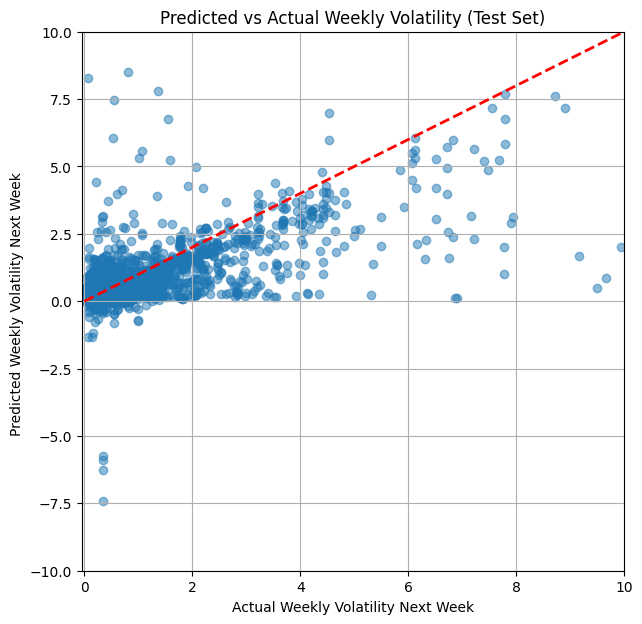

In [15]:
#repeat for daily spike vs week after volatility
# Create lagged features grouped by Ticker
max_lag = 5
for lag in range(1, max_lag + 1):
    spike_data[f'Spike_lag_{lag}'] = spike_data.groupby('Ticker')['Spike'].shift(lag)
    spike_data[f'WeeklyVolatility_lag_{lag}'] = spike_data.groupby('Ticker')['actual_weekly_volatility'].shift(lag)
    spike_data[f'WeeklyMarketVolatility_lag_{lag}'] = spike_data.groupby('Ticker')['weekly_SP500_actual_volatility'].shift(lag)
# Create target variable: future weekly volatility (week after)
spike_data['WeeklyVolatility_next'] = spike_data.groupby('Ticker')['actual_weekly_volatility'].shift(-1)
# Drop rows with any missing values for these lagged features or target
features = [f'Spike_lag_{lag}' for lag in range(1, max_lag + 1)] + \
           [f'WeeklyVolatility_lag_{lag}' for lag in range(1, max_lag + 1)] + \
           [f'WeeklyMarketVolatility_lag_{lag}' for lag in range(1, max_lag + 1)]
spike_data_model = spike_data.dropna(subset=features + ['WeeklyVolatility_next'])
X = spike_data_model[features]*1000
y = spike_data_model['WeeklyVolatility_next']*1000
# Train-test split (chronological)
split_date = '2025-04-01'
train_mask = spike_data_model['Date'] < split_date
test_mask = spike_data_model['Date'] >= split_date
X_train, y_train = X[train_mask], y[train_mask]
X_test, y_test = X[test_mask], y[test_mask]
# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)
r2_test = model.score(X_test, y_test)
print(f"Test R²: {r2_test:.4f}")
print("Test RMSE:", rmse)
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")
# Plot predicted vs actual
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Weekly Volatility Next Week')
plt.ylabel('Predicted Weekly Volatility Next Week ')
plt.title('Predicted vs Actual Weekly Volatility (Test Set)')
plt.grid(True)
plt.xlim(-.05, 10)
plt.ylim(-10, 10)
plt.show()


Test R²: 0.7784
Test RMSE: 0.7887691890722471
Spike_lag_1: 0.0000
Spike_lag_2: 0.0000
Spike_lag_3: 0.0000
BiWeeklyVolatility_lag_1: 0.9282
BiWeeklyVolatility_lag_2: 0.0266
BiWeeklyVolatility_lag_3: -0.0647
BiWeeklyMarketVolatility_lag_1: 0.2036
BiWeeklyMarketVolatility_lag_2: 0.0500
BiWeeklyMarketVolatility_lag_3: -0.3226


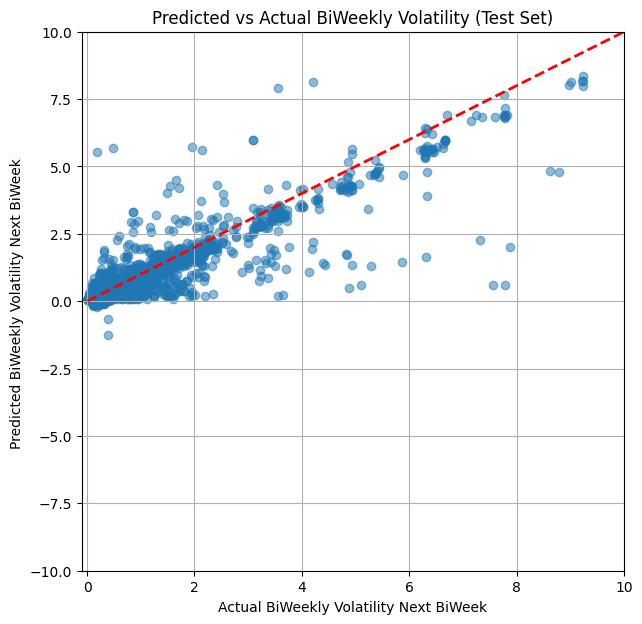

In [14]:
#Repeat for daily spike vs biweek after volatility
# Create lagged features grouped by Ticker
max_lag = 3
for lag in range(1, max_lag + 1):
    spike_data[f'Spike_lag_{lag}'] = spike_data.groupby('Ticker')['Spike'].shift(lag)
    spike_data[f'BiWeeklyVolatility_lag_{lag}'] = spike_data.groupby('Ticker')['actual_biweekly_volatility'].shift(lag)
    spike_data[f'BiWeeklyMarketVolatility_lag_{lag}'] = spike_data.groupby('Ticker')['biweekly_SP500_actual_volatility'].shift(lag)
# Create target variable: future biweekly volatility (biweek after)
spike_data['BiWeeklyVolatility_next'] = spike_data.groupby('Ticker')['actual_biweekly_volatility'].shift(-1)
# Drop rows with any missing values for these lagged features or target
features = [f'Spike_lag_{lag}' for lag in range(1, max_lag + 1)] + \
           [f'BiWeeklyVolatility_lag_{lag}' for lag in range(1, max_lag + 1)] + \
           [f'BiWeeklyMarketVolatility_lag_{lag}' for lag in range(1, max_lag + 1)]
spike_data_model = spike_data.dropna(subset=features + ['BiWeeklyVolatility_next'])
X = spike_data_model[features]*1000
y = spike_data_model['BiWeeklyVolatility_next']*1000
# Train-test split (chronological)
split_date = '2025-04-01'
train_mask = spike_data_model['Date'] < split_date
test_mask = spike_data_model['Date'] >= split_date
X_train, y_train = X[train_mask], y[train_mask]
X_test, y_test = X[test_mask], y[test_mask]
# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)
r2_test = model.score(X_test, y_test)
print(f"Test R²: {r2_test:.4f}")
print("Test RMSE:", rmse)
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")
# Plot predicted vs actual
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual BiWeekly Volatility Next BiWeek')
plt.ylabel('Predicted BiWeekly Volatility Next BiWeek ')
plt.title('Predicted vs Actual BiWeekly Volatility (Test Set)')
plt.grid(True)
plt.xlim(-.1, 10)
plt.ylim(-10, 10)
plt.show()


Feature: Spike, Coefficient: -0.0004
Feature: ExpectedDailyVariance, Coefficient: 0.0496
Feature: SP500_actual_volatility, Coefficient: 0.8139
Feature: SP500_expected_volatility, Coefficient: 0.0710
Test R²: 0.1611


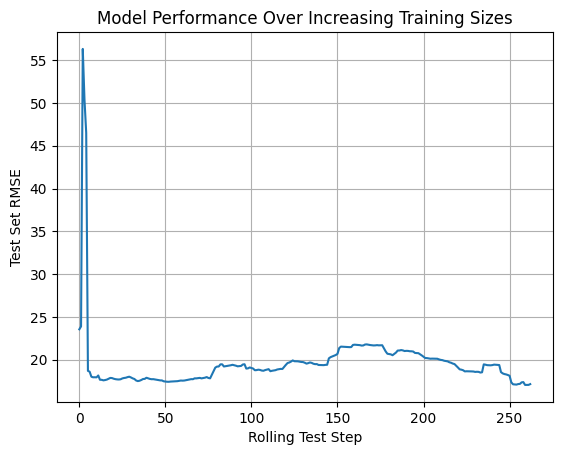

In [ ]:
#Dynamic train-test split with increasing training size
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

X_cols = ['Spike', 'ExpectedDailyVariance', 'SP500_actual_volatility', 'SP500_expected_volatility']

# Convert columns to numeric (convert errors to NaN)
for col in X_cols + ['actual_volatility']:
    spike_data[col] = pd.to_numeric(spike_data[col], errors='coerce')

# Drop rows with NA in features or target
clean_df = spike_data.dropna(subset=X_cols + ['actual_volatility']).copy()

# Scale features and target by 1000
clean_df[X_cols] = clean_df[X_cols] * 1000
clean_df['actual_volatility_scaled'] = clean_df['actual_volatility'] * 1000

# Sort by Date to ensure chronological order for time-series splitting
clean_df = clean_df.sort_values('Date')

unique_dates = clean_df['Date'].unique()
test_size = 100  # number of days to include in each test set (adjust as needed)

rmse_scores = []

for start_test_idx in range(1, len(unique_dates) - test_size):
    train_dates = unique_dates[:start_test_idx]
    test_dates = unique_dates[start_test_idx:start_test_idx + test_size]

    train_df = clean_df[clean_df['Date'].isin(train_dates)]
    test_df = clean_df[clean_df['Date'].isin(test_dates)]

    X_train = train_df[X_cols]
    y_train = train_df['actual_volatility_scaled']

    X_test = test_df[X_cols]
    y_test = test_df['actual_volatility_scaled']

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

# After model.fit(X, y)

importance = model.coef_

for i, v in enumerate(importance):
    print(f"Feature: {X_cols[i]}, Coefficient: {v:.4f}")

r2_test = model.score(X_test, y_test)
print(f"Test R²: {r2_test:.4f}")

# Plot RMSE trend over time
plt.plot(rmse_scores)
plt.xlabel('Rolling Test Step')
plt.ylabel('Test Set RMSE')
plt.title('Model Performance Over Increasing Training Sizes')
plt.grid(True)
plt.show()
